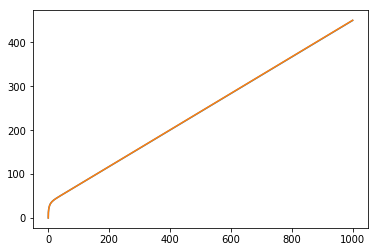

In [1]:
from fwell.fwell import FWell
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

outer_bound = "nnnn"
top_bound = "imp"
bottom_bound = 'imp'
wtype = 'frac'
nseg = 20
nwells = 1
Xe = 1000
Ye = 1000
Xf = 100
xw = Xe/2
yw = Ye/2
xwds = [xw/Xf]
ywds = [yw/Xf]
xed = Xe/Xf
yed = Ye/Xf
Fcd = 10
k = 10
h = 10
ct = 1e-5
mu = 1
B = 1
fi = 0.1
Q = 100
ts = np.logspace(-2,3, 100)
CT = 0.00036*k/(fi*mu*ct*Xf*Xf)
CP = Q*18.42*mu*B/(k*h)
tds = ts*CT
fwell = FWell(outer_bound, top_bound, bottom_bound, wtype, nseg, nwells, xwds, ywds, xed=xed, yed=yed, attrs={'Fcd': Fcd})
fpds = []
df = pd.read_csv('./saphire/test2.txt', delim_whitespace=True, skiprows = 1)
t_saph = np.array(df["(hr)"])
p_saph = np.array(df["(atm)"])
for t in t_saph:
    if t == 0:
        fpds.append(0)
    else:
        fpds.append(fwell.pw(t*CT))
fpds = np.array(fpds)
dp_saph = np.abs(p_saph-p_saph[0])
plt.plot(t_saph, dp_saph)
plt.plot(t_saph,CP*fpds)

In [11]:
from fwell.ffunc.ffuncs import ihF2E, ih1F2H
from fwell.buffer import Buffer
# ih1F2H(zd, zwd, x1, x2, u, ksid, ksiwd, ksied, ksiede, hd, yd, ywd, buf, fid)
# ihF2E(zd, zwd, x1, x2, u, ksid, ksiwd, ksied, ksiede, hd, yd, ywd, yed, buf, fid)

In [5]:
xd, xwd, yd, ywd, x1, x2 = fwell.lw.xd, fwell.lw.xwd, fwell.lw.yd, fwell.lw.ywd, fwell.lw.x1, fwell.lw.x2

In [8]:
zd = 0.5*np.ones_like(xd)
zwd = zd+0.01

In [13]:
s = 0.01
u = s
hd = 0.1
buf = Buffer()
ihF2E(zd, zwd, x1,x2,u,xd,xwd,xed,xed,hd,yd,ywd,yed,buf, "1")

TypeError: ihF2En() takes 15 positional arguments but 16 were given